### 先创造一个文本列表用于储存年份文本

In [2]:
yearslist = {}  #用以年份为key 文档名为value 的字典会更好？
begin = 1880
end = 2010 + 1

for x in range(end - begin):
    tempstr = "babynames\yob"+str(begin+x)+".txt";
    yearslist[str(begin+x)] = tempstr
#yearslist 中保存了所有babyname文档的名字 方便以后导入


## 第1.2问读取姓名数据，存储为Pandas的DataFrame； 输入姓名、年份，输出该姓名在该年份的出生人数；

In [ ]:

import numpy as np
from pandas import DataFrame, Series
import pandas as pd
year1 = input("请输入一个年份 ： ") 
path = np.loadtxt(yearslist[year1],delimiter = "," , usecols=(0,1,2) , dtype=str) #用字典的方法 通过year1 的文本读取此文件 默认数据类型都为str
babyframe = DataFrame(path,columns=['Name','sex','Num'])  #转化成为DataFrame
babyframe['Num']=babyframe['Num'].astype(np.int32)   #babyframe 的Num列从str转化为 int32 
babyframe

In [ ]:
def get_counts(frame,name):   #定义一个用于统计姓名的方法
    counts = {}
    t_frame = frame.loc[frame['Name'] == name]    #锁定姓名等于name的 一列
    counts[name] = t_frame.iloc[:,2].sum()
    return counts

In [4]:
babyname = input("请输入一个婴儿的名字 ： ")
counts = get_counts(babyframe,babyname)
print("姓名为",babyname,"的人数为",counts[babyname])   

请输入一个婴儿的名字 ： Anna
姓名为 Anna 的人数为 2616


## 第三问 输入姓名、开始年份和结束年份，绘制该姓名在各年份出生人数折线图；

In [5]:
begin = input("请输入一个开始年份： ")  #先输入开始结束年份 取得一个DataFrame
end  = input("请输入一个结束年份 ")
years = range(int(begin), int(end))

pieces = []
columns = ['Name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
babyframe = pd.concat(pieces, ignore_index=True)

请输入一个开始年份： 1880
请输入一个结束年份 1900


### 通过姓名取得一个小 DataFrame

In [6]:
name = input("请输入一个姓名 ： ")
t_frame = babyframe.loc[babyframe['Name'] == name] 


请输入一个姓名 ： Anna


### 对不同性别的人 求和，取得一个只有年份与人数的Series

In [7]:
a = t_frame.groupby('year').births.sum()  
a.name = name
b = DataFrame(a)  #转化为DataFrame


### 用pandas 自带的plot 对这个DataFrame画图

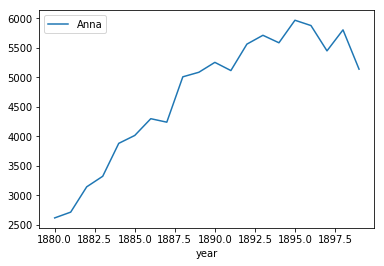

In [9]:
b.plot(label="bb",kind='line', rot=0) 

### 利用matplotlib API画图

Text(0,0.5,'num')

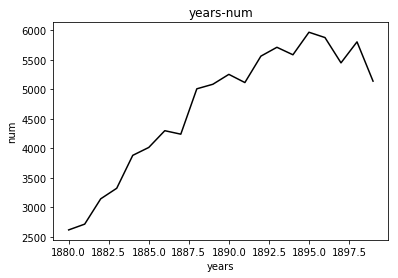

In [10]:
import matplotlib.pyplot as plt  #利用matplotlib API画图
fig = plt.figure()             #创立figure对象 储存位图
ax = fig.add_subplot(1,1,1)   #添加一个位图  一共有1x1个位图 这是第1个位图
plt.plot(b,'k-',label = name) #画出第一个线 b中提取数据  标签为name
ax.set_title('years-num')   #设置标题 以及x，y轴名称
ax.set_xlabel('years')
ax.set_ylabel('num')

## 第四问. 输入若干姓名、开始年份和结束年份，绘制这些姓名在对应年份区间的出生总人数的条状图；

In [11]:
begin = input("请输入一个开始年份： ")  #先输入开始结束年份 取得一个DataFrame
end  = input("请输入一个结束年份 ")
years = range(int(begin), int(end))

pieces = []
columns = ['Name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
babyframe = pd.concat(pieces, ignore_index=True)


请输入一个开始年份： 1880
请输入一个结束年份 1900


### 创建用于储存若干姓名的list 且输入若干姓名后 输入Q退出

In [13]:
Names = []  #用于储存若干姓名的list
name = ''
print("输入若干姓名并且输入Q为退出。")
while(name != 'Q'):                      
    name = input("输入姓名： ")   
    Names.append(name);
Names.pop()            #删除最后一位元素 'Q'
Names 

输入若干姓名并且输入Q为退出。
输入姓名： Anna
输入姓名： Mary
输入姓名： Q


['Anna', 'Mary']

### #与上面相似 但是由于是多个DataFrame 需通过字典储存每一个小DataFrame

In [14]:
t_frames = {}
for t_name in Names:
    t_frame = babyframe.loc[babyframe['Name'] == t_name]  #一个小的frame
    t_frames[t_name] = t_frame  #通过姓名存入一个小的frame


In [15]:
a = {}  #与第二题画图一样 不过a 与b  都成为字典
b = {}
for key, v in t_frames.items():      #其中key 是名称 V是字典里存的Series
    a[key] = v.groupby('year').births.sum()  #对不同性别的人 求和，取得一个只有年份与人数的Series
    a[key].name = key+'_num'
    b[key] = DataFrame(a[key])  #转化为DataFrame
b

{'Anna':       Anna_num
 year          
 1880      2616
 1881      2714
 1882      3143
 1883      3322
 1884      3880
 1885      4014
 1886      4298
 1887      4239
 1888      5008
 1889      5085
 1890      5253
 1891      5114
 1892      5562
 1893      5712
 1894      5585
 1895      5967
 1896      5877
 1897      5448
 1898      5804
 1899      5138, 'Mary':       Mary_num
 year          
 1880      7092
 1881      6948
 1882      8179
 1883      8044
 1884      9253
 1885      9166
 1886      9923
 1887      9935
 1888     11804
 1889     11690
 1890     12113
 1891     11743
 1892     13224
 1893     12839
 1894     13199
 1895     13493
 1896     13868
 1897     13475
 1898     14456
 1899     13222}

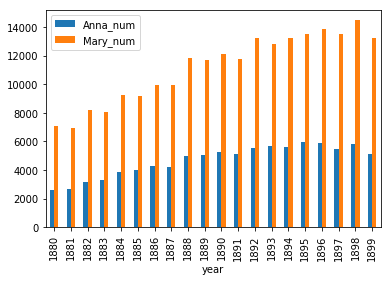

In [16]:
pieces = []   #用一个列表保存需要合并的DataFrame
for key,v in b.items():   
    pieces.append(v)
result=pd.concat(pieces,sort=True,axis=1)  #合并Frame  注意axis = 1   
result.plot(kind = 'bar',style = 'k--')  

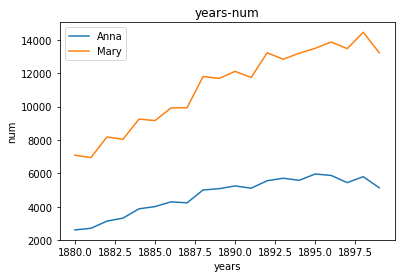

In [17]:
#同上
fig = plt.figure()             #创立figure对象 储存位图
ax = fig.add_subplot(1,1,1)   #添加一个位图  一共有1x1个位图 这是第1个位图
for key,v in b.items():
    plt.plot(v,label = key) #画出第一个线 b中提取数据  标签为name
ax.set_title('years-num')   #设置标题 以及x，y轴名称
ax.set_xlabel('years')
ax.set_ylabel('num')
ax.legend(loc = 'best')

## 第五问 输入姓名、开始年份、结束年份、人口预期寿命，绘制该姓名在各年份生存人数折线图；

In [18]:
begin = input("请输入一个开始年份： ")  #先输入开始结束年份 取得一个DataFrame
end  = input("请输入一个结束年份 ")
years = range(int(begin), int(end))

pieces = []
columns = ['Name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
babyframe = pd.concat(pieces, ignore_index=True)


请输入一个开始年份： 1880
请输入一个结束年份 2000


In [19]:
Life_expectancy = input("请输入人口预期寿命 ：")
name = input("请输入一个姓名 ： ")
t_frame = babyframe.loc[babyframe['Name'] == name]  #通过姓名取得一个小 DataFrame

请输入人口预期寿命 ：60
请输入一个姓名 ： Anna


In [1]:
a = t_frame.groupby('year').births.sum()  #对不同性别的人 求和，取得一个只有年份与人数的Series
a.name = name
b = DataFrame(a)  #转化为DataFrame
b

NameError: name 't_frame' is not defined

In [21]:
live = Series()   #用于储存或者人数的Series

In [22]:
for i in range(int(begin),int(end)):   #
    if(str(i-1) in live.index):            #表示第i年的 前一年有数据  即不是第一年
        if(str(i - int(Life_expectancy)) in live.index):
            live[str(i)] = b[name][i] + live[str(i-1)] - b[name][i - int(Life_expectancy)]  #年份超过平均寿命的 即 有人去世了
        else:
            live[str(i)] = b[name][i] + live[str(i-1)]   #无人去世
    else:
        live[str(i)] = b[name][i]            #第一年
live.name = "num of " + name

In [23]:
Live_data = DataFrame(live)
Live_data.index

Index(['1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888',
       '1889',
       ...
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999'],
      dtype='object', length=120)

#### 实现第五问 该姓名在各年份生存人数折线图

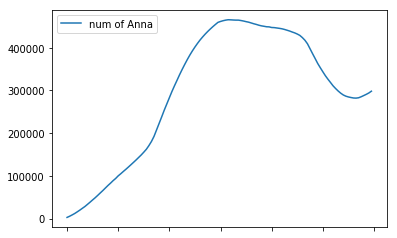

In [24]:
Live_data.plot(label="bb",kind='line', rot=0,use_index = True) #用pandas 自带的plot 对这个DataFrame画图


## 第六问 输入姓名A、姓名B、开始年份和结束年份，计算姓名A与姓名B出生人数的相关系数；

In [1]:
A = input("请输入一个姓名A ： ")
B = input("请输入一个姓名B ： ")
Names = [A,B]  #用于储存两个姓名

请输入一个姓名A ： Anna
请输入一个姓名B ： Mary


In [6]:
begin = input("请输入一个开始年份： ")  #先输入开始结束年份 取得一个DataFrame
end  = input("请输入一个结束年份 ")
years = range(int(begin), int(end))

pieces = []
columns = ['Name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
babyframe = pd.concat(pieces, ignore_index=True)


请输入一个开始年份： 1880
请输入一个结束年份 1900


In [7]:
t_frames = {}
for t_name in Names:
    t_frame = babyframe.loc[babyframe['Name'] == t_name]  #一个小的frame
    t_frames[t_name] = t_frame  #通过姓名存入一个小的frame

In [8]:
a = {}  #同第四问处理方式一样
b = {}
for key, v in t_frames.items():      #其中key 是名称 V是字典里存的Series
    a[key] = v.groupby('year').births.sum()  #对不同性别的人 求和，取得一个只有年份与人数的Series
    a[key].name = key+'_num'
    b[key] = DataFrame(a[key])  #转化为DataFrame

In [9]:
pieces = []   #用一个列表保存需要合并的DataFrame
for key,v in b.items():   
    pieces.append(v)
result=pd.concat(pieces,sort=True,axis=1)  #合并Frame  注意axis = 1 

In [10]:
result.corr()  #得到姓名A与姓名B的相关系数

,Anna_num,Mary_num
Anna_num,1.000000,0.981203
Mary_num,0.981203,1.000000


# 第7问 输入年份，计算哪些名字是男性和女性都取的，若没有输出None，若有请按照取名总人数进行排序；

In [11]:
begin = input("请输入一个开始年份： ")  #先输入开始结束年份 取得一个DataFrame
end  = begin                                #默认结束年份为开始年份+1
years = range(int(begin), int(end)+1)

pieces = []
columns = ['Name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
babyframe = pd.concat(pieces, ignore_index=True)

请输入一个开始年份： 1888


### 通过一个Series储存 检索babyframe中 的每一个姓名 ，因为使用了Unique 不会重复检索， 然后通过每个姓名生成一个该姓名才有的dataframe ，然后查看它是否同时在Sex列中含有F或M  如果都有 就通过groupby sum 相加

In [12]:
unique_name = Series()
for name in babyframe['Name'].unique() :
    t = babyframe.loc[babyframe['Name'] == name]   #取出每一个名字的 DataFrame 如上
    if('F' not in t['sex'].unique() or 'M' not in t['sex'].unique()):  #如果某一个名字的 M 或F 不在它对应的DataFrame 即不是男女都取的名字
            unique_name[name] = 'None' 
    else:
            unique_name[name] = t.groupby('Name').births.sum()[0]   #根据姓名 相加 所有的性别的人数  注：groupbt得到的是一个Series 其中第0号元素为人数
Undata = DataFrame(unique_name,columns = ['Births'])
t = Undata.sort_index(axis = 1)

In [13]:
t  #第7问有些年份运算的时间很长

,Births
Mary,11804
Anna,5008
Elizabeth,3236
Emma,3104
Margaret,2914
Minnie,2668
Bertha,2463
Florence,2455
Ethel,2386
Bessie,2291


## 第八题 计算输出每个年份的男性5大常用名和女性5大常用名；

In [14]:
years = range(1880, 2011)    #所有年份
pieces = []
columns = ['Name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
babyframe = pd.concat(pieces, ignore_index=True)

### 此时的babyframe 包含了所有年份的所有数据

### 通过检索每一年的每一个性别  然后进行排序 然后输出前5行的 某个性别 姓名人数最多

In [15]:
for year in babyframe['year'].unique():    
    for sex in babyframe['sex'].unique():
        sex_frame = babyframe.loc[babyframe['sex'] == sex]     #通过性别进行检索
        sex_year_frame = sex_frame.loc[sex_frame['year']== year] #通过年份检索
        sex_year_frame.sort_index(axis = 1)               #对 生成的dataframe 进行排序
        print('In the ' + str(year) + ' year.' + 'the '+ str(sex) + ' people is :' );
        print(sex_year_frame['Name'][0:5].values);

In the 1880 year.the F people is :
['Mary' 'Anna' 'Emma' 'Elizabeth' 'Minnie']
In the 1880 year.the M people is :
['John' 'William' 'James' 'Charles' 'George']
In the 1881 year.the F people is :
['Mary' 'Anna' 'Emma' 'Elizabeth' 'Margaret']
In the 1881 year.the M people is :
['John' 'William' 'James' 'George' 'Charles']
In the 1882 year.the F people is :
['Mary' 'Anna' 'Emma' 'Elizabeth' 'Minnie']
In the 1882 year.the M people is :
['John' 'William' 'James' 'George' 'Charles']
In the 1883 year.the F people is :
['Mary' 'Anna' 'Emma' 'Elizabeth' 'Minnie']
In the 1883 year.the M people is :
['John' 'William' 'James' 'Charles' 'George']
In the 1884 year.the F people is :
['Mary' 'Anna' 'Emma' 'Elizabeth' 'Minnie']
In the 1884 year.the M people is :
['John' 'William' 'James' 'George' 'Charles']
In the 1885 year.the F people is :
['Mary' 'Anna' 'Emma' 'Elizabeth' 'Margaret']
In the 1885 year.the M people is :
['John' 'William' 'James' 'George' 'Charles']
In the 1886 year.the F people is :
[

In the 1931 year.the M people is :
['Robert' 'James' 'John' 'William' 'Richard']
In the 1932 year.the F people is :
['Mary' 'Betty' 'Barbara' 'Dorothy' 'Joan']
In the 1932 year.the M people is :
['Robert' 'James' 'John' 'William' 'Richard']
In the 1933 year.the F people is :
['Mary' 'Betty' 'Barbara' 'Dorothy' 'Joan']
In the 1933 year.the M people is :
['Robert' 'James' 'John' 'William' 'Richard']
In the 1934 year.the F people is :
['Mary' 'Betty' 'Barbara' 'Shirley' 'Dorothy']
In the 1934 year.the M people is :
['Robert' 'James' 'John' 'William' 'Richard']
In the 1935 year.the F people is :
['Mary' 'Shirley' 'Barbara' 'Betty' 'Patricia']
In the 1935 year.the M people is :
['Robert' 'James' 'John' 'William' 'Richard']
In the 1936 year.the F people is :
['Mary' 'Shirley' 'Barbara' 'Betty' 'Patricia']
In the 1936 year.the M people is :
['Robert' 'James' 'John' 'William' 'Richard']
In the 1937 year.the F people is :
['Mary' 'Barbara' 'Patricia' 'Shirley' 'Betty']
In the 1937 year.the M pe

In the 1982 year.the M people is :
['Michael' 'Christopher' 'Matthew' 'Jason' 'David']
In the 1983 year.the F people is :
['Jennifer' 'Jessica' 'Amanda' 'Ashley' 'Sarah']
In the 1983 year.the M people is :
['Michael' 'Christopher' 'Matthew' 'David' 'Joshua']
In the 1984 year.the F people is :
['Jennifer' 'Jessica' 'Ashley' 'Amanda' 'Sarah']
In the 1984 year.the M people is :
['Michael' 'Christopher' 'Matthew' 'Joshua' 'David']
In the 1985 year.the F people is :
['Jessica' 'Ashley' 'Jennifer' 'Amanda' 'Sarah']
In the 1985 year.the M people is :
['Michael' 'Christopher' 'Matthew' 'Joshua' 'Daniel']
In the 1986 year.the F people is :
['Jessica' 'Ashley' 'Amanda' 'Jennifer' 'Sarah']
In the 1986 year.the M people is :
['Michael' 'Christopher' 'Matthew' 'Joshua' 'David']
In the 1987 year.the F people is :
['Jessica' 'Ashley' 'Amanda' 'Jennifer' 'Sarah']
In the 1987 year.the M people is :
['Michael' 'Christopher' 'Matthew' 'Joshua' 'David']
In the 1988 year.the F people is :
['Jessica' 'Ashle

In [ ]:
#运行时间很长